<hr style="height: 1px;">
<i>Submitted By Prathamesh Dongare (prathameshdongare1905@gmail.com)</i>
<hr style="height: 1px;">

### Task 01: Data plotting and computing the autocorrelation function

In [1]:
#Import Lib.

import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.signal import correlate
from scipy.fft import fft, fftfreq

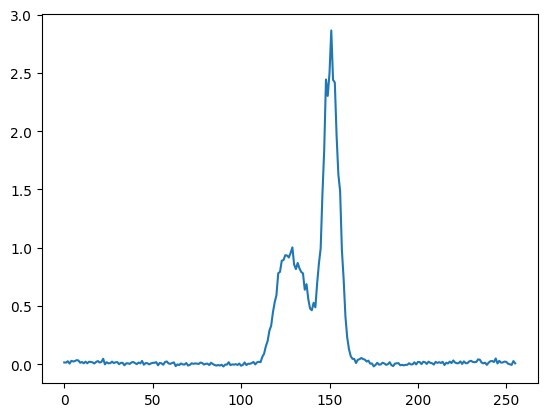

In [2]:
# Load the data

def load(data):
    x_data=[]
    y_data=[]
    with open(data,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=' ')
        for row in plots:
            x_data.append(float(row[2]))
            y_data.append(float(row[3]))
        x_data = np.array(x_data)
        y_data = np.array(y_data)
    return x_data, y_data

x_data, y_data = load('b4181218.paz.pazi.DFTb256.ascii')
plt.plot(x_data,y_data)

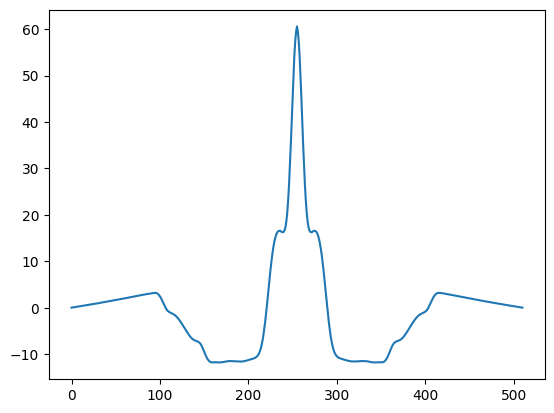

In [3]:
# Autocorrelation function

y_data = y_data - np.mean(y_data)
autocorr = correlate(y_data, y_data, mode='full')
plt.plot(autocorr)

### Task 02: Finding time period of bright pulses

In [4]:
# load the data

def load(idata): 
    x_data = []
    y_data = []
    
    # Open the file specified by idata
    with open(idata, 'r') as file:
        for line in file:
            row = line.strip().split()

            # Convert to float and append to x_data and y_data
            x_data.append(float(row[0]))
            y_data.append(float(row[1]))
    
    return np.array(x_data), np.array(y_data)

x_data, y_data = load('a1844d141p64.ascii')


Estimated period of the bright pulses: 0.1195733512712713 seconds


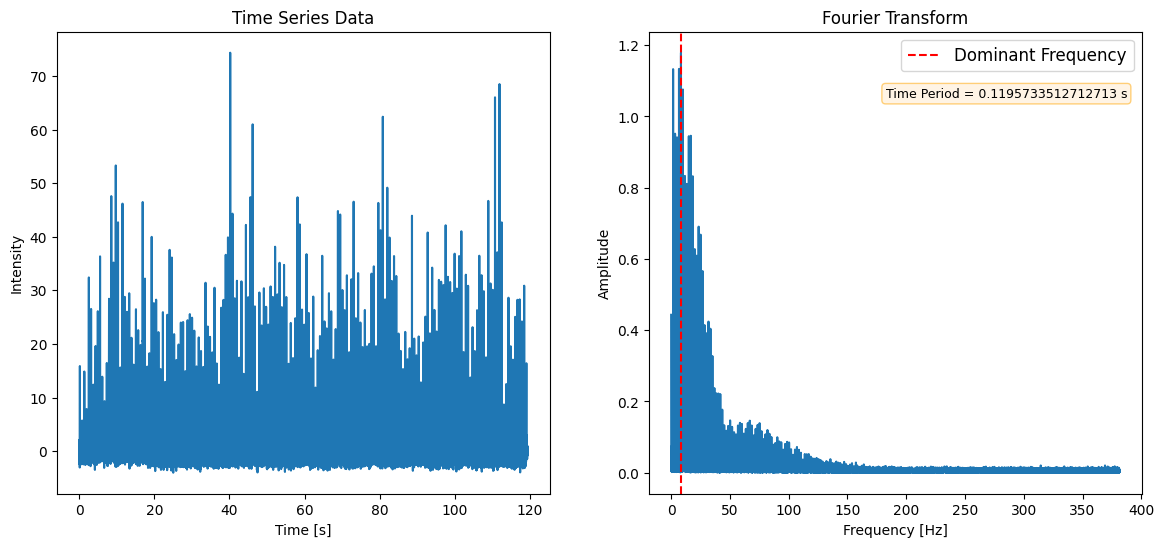

In [5]:
# label the data
time = x_data
intensity = y_data

# Number of samples
N = len(time)

# Sample spacing
T = 0.00131072

# Apply Fourier Transform
y_fft = fft(intensity)
x_fft = fftfreq(N, T)[:N//2] # N//2 is used to get only positive freq

# Finding the dominant frequency which will be the most periodic freq (i.e bright pulses)
i_max = np.argmax(np.abs(y_fft[:N//2]))
dominant_freq = x_fft[i_max]

# Get the period
period = 1 / dominant_freq
print(f"Estimated period of the bright pulses: {period} seconds")

# Plot the data
plt.figure(figsize=(14, 6))

# 1.Original data (time series)
plt.subplot(1, 2, 1)
plt.plot(time, intensity)
plt.title('Time Series Data')
plt.xlabel('Time [s]')
plt.ylabel('Intensity')

# 2. Fourier Transform (Freq domain)
plt.subplot(1, 2, 2)
plt.plot(x_fft, 2/N*np.abs(y_fft[:N//2])) # 2/N is used for normalization
plt.axvline(x=dominant_freq, color='r', linestyle = '--', label='Dominant Frequency')
plt.legend(loc='upper right', fontsize=12)
text = (f'Time Period = {period} s')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
plt.text(0.97, 0.88, text, fontsize=9, bbox=bbox, horizontalalignment='right', 
         verticalalignment='top', transform=plt.gca().transAxes)

plt.title('Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.show()
